<a href="https://colab.research.google.com/github/tiffany-k/Data201-Project1/blob/main/Tiffany_King_FINAL_Data201_GroupProject_Team_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 
import json
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# .csv file import
# First, check  working directory
# os.getcwd()
# If need to change working directory
# os.chdir(path)
# .csv file import
df = pd.read_csv("/content/gdrive/MyDrive/Accused_Pre-Trial_Inmates_in_Correctional_Facilities.csv", index_col=False)

## **Data Preparation and Wrangling with Pandas and Numpy**

In [ ]:
# Evaluating initial data 
df.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351849 entries, 0 to 5351848
Data columns (total 10 columns):
 #   Column                                            Dtype 
---  ------                                            ----- 
 0   DOWNLOAD DATE                                     object
 1   IDENTIFIER                                        object
 2   LATEST ADMISSION DATE                             object
 3   RACE                                              object
 4   GENDER                                            object
 5   AGE                                               int64 
 6   BOND AMOUNT                                       int64 
 7   OFFENSE                                           object
 8   FACILITY                                          object
 9   DETAINER                                          object
dtypes: int64(2), object(8)
memory usage: 408.3+ MB


In [ ]:
df.describe()

,AGE,BOND AMOUNT
count,5.351849e+06,5.351849e+06
mean,3.460968e+01,2.477388e+05
std,1.139510e+01,4.502701e+05
min,1.500000e+01,1.000000e+00
25%,2.600000e+01,3.350000e+04
50%,3.300000e+01,1.000000e+05
75%,4.200000e+01,2.500000e+05
max,8.700000e+01,9.200000e+06


In [ ]:
#Checking Shape
print(df.shape)

(5351849, 10)


In [ ]:
#Check DataFrame type
type(df)

pandas.core.frame.DataFrame

## **Clean/Arrange Data**

In [ ]:
# change column names
df = df.rename(columns = {"DOWNLOAD DATE": "Download_Date", "LATEST ADMISSION DATE": "Date", "BOND AMOUNT":"Bond"})
df.head()

,Download_Date,IDENTIFIER,Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [ ]:
# Drop Columns
df = df.drop(['Download_Date', 'IDENTIFIER', 'FACILITY'], axis = 'columns')
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE,DETAINER
0,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NONE


In [ ]:
df = df.drop([df.columns[-1]], axis='columns')
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE
0,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF


In [ ]:
# Checking data types for each column
print(df.dtypes)

Date       object
RACE       object
GENDER     object
AGE         int64
Bond        int64
OFFENSE    object
dtype: object


## **Addressing NA/Null Values**

In [ ]:
# Check null 
df.isnull()

,Date,RACE,GENDER,AGE,Bond,OFFENSE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5351844,False,False,False,False,False,False
5351845,False,False,False,False,False,False
5351846,False,False,False,False,False,False
5351847,False,False,False,False,False,False


In [ ]:
# Null sum
df.isnull().sum()

Date       0
RACE       0
GENDER     0
AGE        0
Bond       0
OFFENSE    0
dtype: int64

## **Date/Time**

In [ ]:
# Changing Date to datetime
df.Date = pd.to_datetime(df.Date)

In [ ]:
# add a column for Year
df['Year'] = df['Date'].dt.year
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018


In [ ]:
# Checking data types for each column
print(df.dtypes)

Date       datetime64[ns]
RACE               object
GENDER             object
AGE                 int64
Bond                int64
OFFENSE            object
Year                int64
dtype: object


In [ ]:
# Groupby Decade
df_decade = df.groupby(df.Year // 10 * 10).sum()
df_decade.head()

,AGE,Bond,Year
Year,,,
1980,4605,2305000,154576
1990,56690,129739550,2225173
2000,2314462,12140035808,117485939
2010,158020882,1175134161337,9260608478
2020,24829139,138454390498,1417247860


In [ ]:
# Groupby Decade
df_decade_mean = df.groupby(df.Year // 10 * 10).mean()
df_decade_mean.head()

,AGE,Bond,Year
Year,,,
1980,59.038462,29551.282051,1981.743590
1990,50.888689,116462.791741,1997.462298
2000,39.521567,207302.274649,2006.180441
2010,34.423360,255991.903593,2017.336293
2020,35.390217,197345.984501,2020.074432


In [ ]:
# Groupby Decade
df_decade_median = df.groupby(df.Year // 10 * 10).median()
df_decade_median.head()

,AGE,Bond,Year
Year,,,
1980,61,35000,1980
1990,49,30000,1999
2000,38,50000,2007
2010,32,100000,2018
2020,34,80000,2020


In [ ]:
# importing pandas as pd
import pandas as pd
  
datetime_series = pd.Series(pd.date_range("1980-01-01", periods=3, freq="Y"))
datetime_series

0   1980-12-31
1   1981-12-31
2   1982-12-31
dtype: datetime64[ns]

In [ ]:
# df.groupby(pd.(key='Date',freq='10Y')).sum()

In [ ]:
df_Year = df.groupby('Year').sum()
df_Year

,AGE,Bond
Year,,
1980,3721,2135000
1988,884,170000
1993,1484,140000
1994,456,8000
1996,27491,114419050
1998,68,180000
1999,27191,14992500
2000,101180,341716800
2001,103429,187671450


In [ ]:
df_Year_mean = df.groupby('Year').mean()
df_Year_mean

,AGE,Bond
Year,,
1980,61.000000,35000.000000
1988,52.000000,10000.000000
1993,53.000000,5000.000000
1994,57.000000,1000.000000
1996,54.872255,228381.337325
1998,34.000000,90000.000000
1999,47.288696,26073.913043
2000,43.220846,145970.439983
2001,42.250408,76663.174020


In [ ]:
df_Year_median = df.groupby('Year').median()
df_Year_median

,AGE,Bond
Year,,
1980,61,35000
1988,52,10000
1993,53,5000
1994,57,1000
1996,60,82500
1998,34,90000
1999,48,10000
2000,43,100000
2001,41,25000


## **Examining Types of Crime**

In [ ]:
# Checking data types for each column
print(df.dtypes)

Date       datetime64[ns]
RACE               object
GENDER             object
AGE                 int64
Bond                int64
OFFENSE            object
Year                int64
dtype: object


In [ ]:
# Examining Unique Entries
df.nunique()

Date       3085
RACE          5
GENDER        2
AGE          72
Bond       4121
OFFENSE     371
Year         29
dtype: int64

In [ ]:
# Examining Offense Types Only
df.OFFENSE.nunique()

371

In [ ]:
# Examining Offense Types
offense_array = df.OFFENSE.unique()
print(offense_array)

['CRIMINAL POSS OF PISTOL/REVOLVER      DF'
 'VIOLATION OF PROBATION OR COND DISCHG' 'CRIMINAL ATTEMPT'
 'CRIM VIOL OF PROTECTIVE ORDER         DF'
 'CRIM VIOL ST CRIM RESTR ORDER         DF'
 'ASSAULT 2ND, VICTIM 60 OR OVER        DF'
 'INTERFERING WITH AN OFFICER           AM'
 'LARCENY, SECOND DEGREE                CF'
 'MURDER                                AF'
 'ASSAULT, SECOND DEGREE                DF' 'ARREST WARRANT'
 'YOUTHFUL OFFENDER' 'UNLAWFUL RESTRAINT, FIRST DEGREE      DF'
 'LARCENY, FIRST DEGREE                 BF'
 'CRIMINAL TRESPASS, THIRD DEGREE       CM'
 'STALKING, 1ST DEGREE                  DF'
 'BURGLARY, THIRD DEGREE                DF'
 'SALE OF NARC/AMPHET BY NON-DEPENDENT   F'
 'ASSAULT 2ND DEGREE WITH A FIREARM     DF'
 'FORGERY, FIRST DEGREE                 CF' 'JUVENILE TRANSFER'
 'CONSPIRACY' 'SEXUAL ASSAULT, FIRST DEGREE           F'
 'ASSAULT ON POLICE OR FIRE OFFICER     CF'
 'FORGERY, SECOND DEGREE                DF'
 'ASSAULT 3RD DEGREE, VICTIM OVER 

In [ ]:
# Convert Array into DataFrame
offense_df = pd.DataFrame(offense_array, columns=['Offense_Type'])
print(offense_df)

                                 Offense_Type
0    CRIMINAL POSS OF PISTOL/REVOLVER      DF
1       VIOLATION OF PROBATION OR COND DISCHG
2                            CRIMINAL ATTEMPT
3    CRIM VIOL OF PROTECTIVE ORDER         DF
4    CRIM VIOL ST CRIM RESTR ORDER         DF
..                                        ...
366                                    SEALED
367  INTENT TO INJURE WITH EXPLOSIVES       F
368  UNLAWFUL ENTRY INTO COIN MACHINE      AM
369  INCSTRUCTION UNLICENSED PERSON IN VEHICL
370  ASSAULT TERMINATING PREGNANCY         AF

[371 rows x 1 columns]


In [ ]:
# Group by offense and bond amount
df_3 = df.groupby(['OFFENSE'], as_index=False).agg({'Bond': sum})
df_3.head()

,OFFENSE,Bond
0,(REPEALED) 53-048,332935000
1,(REPEALED) 53-124,10000
2,(REPEALED) 53-173,274750
3,53A021,883105836
4,53A223C,425900


In [ ]:
df_3['Offense_Total'] = df['OFFENSE']
df_3.head()

,OFFENSE,Bond,Offense_Total
0,(REPEALED) 53-048,332935000,CRIMINAL POSS OF PISTOL/REVOLVER DF
1,(REPEALED) 53-124,10000,VIOLATION OF PROBATION OR COND DISCHG
2,(REPEALED) 53-173,274750,CRIMINAL ATTEMPT
3,53A021,883105836,CRIM VIOL OF PROTECTIVE ORDER DF
4,53A223C,425900,CRIMINAL ATTEMPT


##**Creating New Column with Offense Category**

In [ ]:
# Successfully creating excel sheet with cell output
# offense_df.to_excel("./offensedf3.xlsx")

In [ ]:
# load newly coded .csv 
df_2 = pd.read_csv("/content/gdrive/MyDrive/offensedf3.csv", index_col=False)
df_2.head()

,Unnamed: 0,Offense_Type,Category
0,0,CRIMINAL POSS OF PISTOL/REVOLVER DF,Weapons
1,1,VIOLATION OF PROBATION OR COND DISCHG,Probation
2,2,CRIMINAL ATTEMPT,Attempt
3,3,CRIM VIOL OF PROTECTIVE ORDER DF,Order
4,4,CRIM VIOL ST CRIM RESTR ORDER DF,Order


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Took exported excel sheet and coded each type of offense as one of following:
1. Person
2. Property
3. Probation
4. Order (Violation of Order by Court, Police, or Municipality)
5. Drugs
6. Weapon
7. Juvenile
8. Attempt

In [ ]:
# Sum of each Type of Category
df_2['Category'].value_counts()


Person       153
Property      89
Order         55
Weapons       32
Drugs         23
Attempt        7
Probation      6
ND             4
Juvenile       2
Name: Category, dtype: int64

In [ ]:
# Sum of each Type of Offense
df_offense = df['OFFENSE'].value_counts()
df_offense.head(50)

VIOLATION OF PROBATION OR COND DISCHG       624816
CRIM VIOL OF PROTECTIVE ORDER         DF    271397
INJURY OR RISK OF INJURY TO MINOR      F    245038
ASSAULT, FIRST DEGREE                 BF    215743
ROBBERY, FIRST DEGREE                 BF    199466
MURDER                                AF    181229
BURGLARY, THIRD DEGREE                DF    161147
SEXUAL ASSAULT, FIRST DEGREE           F    150527
ASSAULT ON POLICE OR FIRE OFFICER     CF    127775
CRIMINAL POSSESSION OF A PISTOL       DF    120866
FAILURE TO APPEAR, FIRST DEGREE       DF    119307
SALE OF NARC/AMPHET BY NON-DEPENDENT   F    118456
CRIMINAL POSS OF PISTOL/REVOLVER      DF    115349
HOME INVASION                         AF    114861
CRIMINAL ATTEMPT                            110031
ASSAULT, THIRD DEGREE                 AM    101101
FAILURE TO APPEAR, SECOND DEGREE      AM     94753
ASSAULT, SECOND DEGREE                DF     94226
LARCENY, FIRST DEGREE                 BF     91870
LARCENY, THIRD DEGREE          

In [ ]:
# The pretty print library allows you to print text with line breaks and indents
# instead of one long line
import pprint as pp

# Created a dictionary out of the two Offense Category dataframe columns
OT_dict = dict(zip(df_2.Offense_Type, df_2.Category))
pp.pprint(OT_dict)

{'(REPEALED) 53-048': 'Order',
 '(REPEALED) 53-124': 'Order',
 '(REPEALED) 53-173': 'Order',
 '53A021': 'Order',
 '53A223C': 'Order',
 'ABUSE OF PERSONS-1ST DEGREE           CF': 'Person',
 'ABUSE OF PERSONS-2ND DEGREE           DF': 'Person',
 'ACT OF TERRORISM-ENHANCE SENT': 'Person',
 'ADULTERY                              AM': 'Person',
 'AFFIRMATIVE DEFENSES TO CIMINAL TRESPASS': 'Property',
 'AGGAVTD SEX ASSLT-VCTM < 13YR         AF': 'Person',
 'ALLOWING PERSON UNDER 16 TO OPERATE MV M': 'Person',
 'ALTERING OR REMOVING IDENT NUMBER      F': 'Property',
 'APPLICATION TO PURCHASE A FIREARM': 'Weapons',
 'ARREST WARRANT': 'Order',
 'ARREST WITHOUT WARRANT': 'Order',
 'ARSON, FIRST DEGREE                   AF': 'Property',
 'ARSON, SECOND DEGREE                  BF': 'Property',
 'ARSON, THIRD DEGREE                   CF': 'Property',
 'ASSAULT 2ND DEGREE WITH A FIREARM     DF': 'Weapons',
 'ASSAULT 2ND WITH MV WHILE INTOXICATED DF': 'Person',
 'ASSAULT 2ND, VICTIM 60 OR OVER      

In [ ]:
# create a new column called 'offense_cat' based on dictionary that maps the appropriate category value
# based on the key in the dictionary
# key/value combinations did not have to be unique as long as the key was unique

df['offense_cat'] = df['OFFENSE'].map(OT_dict)

In [ ]:
df.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt


In [ ]:
# Checking for nulls
df.isnull().sum()

Date           0
RACE           0
GENDER         0
AGE            0
Bond           0
OFFENSE        0
Year           0
offense_cat    0
dtype: int64

In [ ]:
# Checking all offense categories included
df.offense_cat.unique()

array(['Weapons', 'Probation', 'Attempt', 'Order', 'Person', 'Property',
       'Juvenile', 'Drugs', 'ND'], dtype=object)

Note:  ND = Not Disclosed - main offense not provided

In [ ]:
# Sum of each Type of Category
df['offense_cat'].value_counts()

Person       1876856
Property     1152549
Order         676128
Probation     638960
Weapons       405835
Drugs         357636
Attempt       189222
Juvenile       53967
ND               696
Name: offense_cat, dtype: int64

##**Creating New Column with Offense Violence Status**

In [ ]:
# load newly coded .csv 
df_3 = pd.read_csv("/content/gdrive/MyDrive/violentstatus.csv", index_col=False)
df_3.head()

,offense_cat,violence_status
0,Weapons,Violent
1,Probation,Non_Violent
2,Attempt,Non_Violent
3,Order,Non_Violent
4,Person,Violent


In [ ]:
# The pretty print library allows you to print text with line breaks and indents
# instead of one long line
import pprint as pp

# Created a dictionary out of the two violent status df columns
OT_dict2 = dict(zip(df_3.offense_cat, df_3.violence_status))
pp.pprint(OT_dict2)

{'Attempt': 'Non_Violent',
 'Drugs': 'Non_Violent',
 'Juvenile': 'ND',
 'ND': 'ND',
 'Order': 'Non_Violent',
 'Person': 'Violent',
 'Probation': 'Non_Violent',
 'Property': 'Non_Violent',
 'Weapons': 'Violent'}


In [ ]:
# Created a new column called 'violence_status' based on dictionary that maps the appropriate category value
# based on the key in the dictionary
# key/value combinations did not have to be unique as long as the key was unique

df['violence_status'] = df['offense_cat'].map(OT_dict2)

In [ ]:
df.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt,Non_Violent
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt,Non_Violent


## **Comparing Bond Amounts Between Groups**

Our team is interested in exploring the relationship between the following:
- Mean bond amounts for any age in each of the Race groups. 
-  Race of individuals and bond amounts
-  Gender and bond amounts
- Violent/non-violent crimes and bond amounts

In the following 7 chunks of code we synthesize the data in order to obtain the mean bond amounts at the age, and gender levels, for each of the 5 Race groups in the data set.  

In [ ]:
#FEMALES bail data subset
bail_Females = df[df.GENDER == 'F']

In [ ]:
#FEMALE data subset by RACE
F_AMER_IND = bail_Females[bail_Females.RACE == 'AMER IND']
F_ASIAN = bail_Females[bail_Females.RACE == 'ASIAN']
F_BLACK = bail_Females[bail_Females.RACE == 'BLACK']
F_HISPANIC = bail_Females[bail_Females.RACE == 'HISPANIC']
F_WHITE = bail_Females[bail_Females.RACE == 'WHITE']

In [ ]:
#FEMALE bond mean amoounts by age
F_AI_Mean = F_AMER_IND.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
F_AS_Mean = F_ASIAN.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
F_BL_Mean = F_BLACK.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
F_HI_Mean = F_HISPANIC.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
F_WH_Mean = F_WHITE.groupby(['AGE','RACE','GENDER'], as_index=False).mean()

In [ ]:
#MALES bail data subset
bail_Males = df[df.GENDER == 'M']

In [ ]:
#MALE data subset by RACE
M_AMER_IND = bail_Males[bail_Males.RACE == 'AMER IND']
M_ASIAN = bail_Males[bail_Males.RACE == 'ASIAN']
M_BLACK = bail_Males[bail_Males.RACE == 'BLACK']
M_HISPANIC = bail_Males[bail_Males.RACE == 'HISPANIC']
M_WHITE = bail_Males[bail_Males.RACE == 'WHITE']

In [ ]:
#MALE bond mean amoounts by age
M_AI_Mean = M_AMER_IND.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
M_AS_Mean = M_ASIAN.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
M_BL_Mean = M_BLACK.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
M_HI_Mean = M_HISPANIC.groupby(['AGE','RACE','GENDER'], as_index=False).mean()
M_WH_Mean = M_WHITE.groupby(['AGE','RACE','GENDER'], as_index=False).mean()

In [ ]:
#JOINED "mean" data frames by gender
F_mean_frames = F_AI_Mean.append([F_AS_Mean, F_BL_Mean, F_HI_Mean, F_WH_Mean])
M_mean_frames = M_AI_Mean.append([M_AS_Mean, M_BL_Mean, M_HI_Mean, M_WH_Mean])

**Mean Bond Amount vs Age, for each of the 5 Race groups, broken down by gender**

As depicted by the scatter plots below, and the regression line.  In all cases there seems to be correlation between mean bond amounts and the age of the individuals.  

For all, but two of the cases - American Indian females, and White males, the correlation between the mean bond amount and age appears to be negative/inverse.  That is to say that as one variable (i.e age) increases, the other variable decreases (i.e. bond amount). For White males, however, the correlation is positive, as the bond amounts increase with age.

In our analysis, American Indians appear to have no offenses after the age of 60.  It is our suspicion, that this perhaps can be due to their shorter life expectancy in comparison to other races. 

The graphs below also validate our previous calculation of the median/mean age by race and bond amounts.  It clearly illustrates that for Asian, Black, and Hispanic races the highest bond amounts appear to be for individuals in their early 30s, as opposed to bond amounts for White males, which highest bond amounts appear to be for individuals in their late 30s - early 40s. 

After looking at covariance, we could validate the existance of inverse/positive relationships between the bond amounts and the age of the different race groups, as seen in the graphs. While this is easily apparent to the eye, our team wanted to examine the stregth of such relationship for each of the Race groups. After looking at the correlation coefficient for each of the groups we were able to uncover that there is a very strong negative relationship between age and bond amounts for Black males of 87.1%.



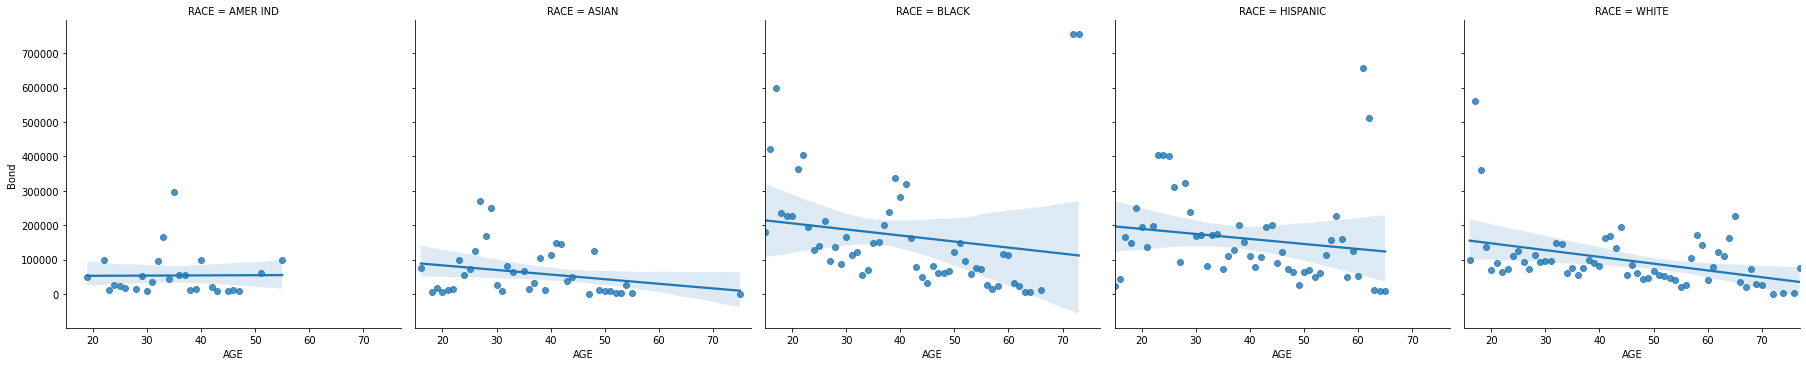

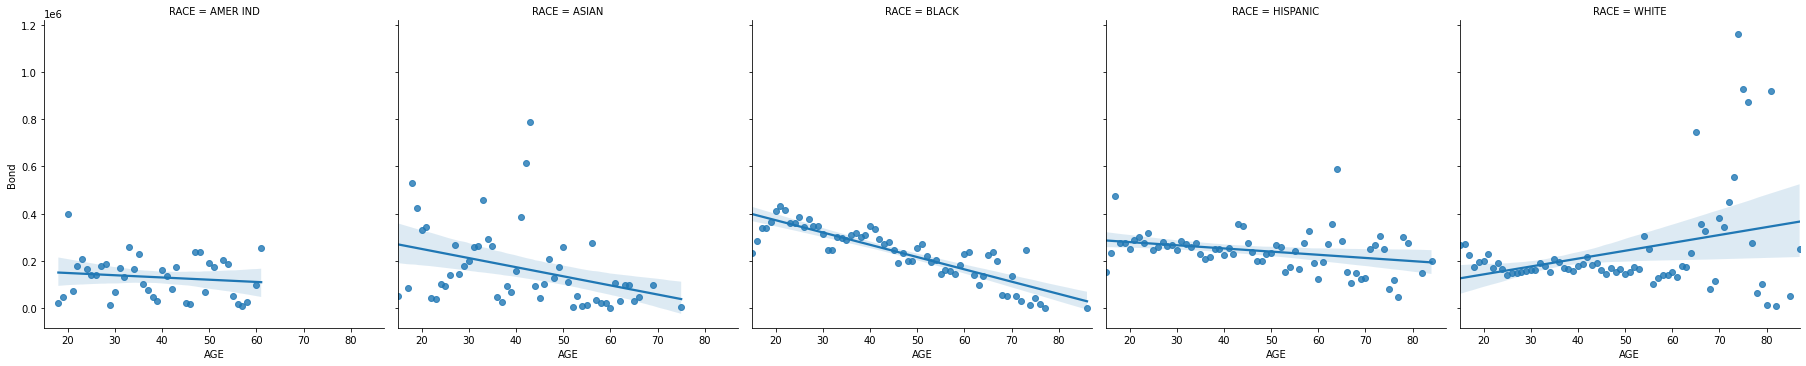

In [ ]:
#FEMALE BOND AMOUNTS vs AGE with regression line &
#MALE BOND AMOUNTS vs AGE with regression line
sns.lmplot(x='AGE',y='Bond', 
           data=F_mean_frames, col='RACE')
plt.show()

sns.lmplot(x='AGE',y='Bond', 
           data=M_mean_frames, col='RACE')
plt.show()

In [ ]:
#Covariance between age and bond amounts for American Indian Females
F_AI_Mean.cov()

,AGE,Bond,Year
AGE,88.000000,5.075401e+03,0.635930
Bond,5075.400781,4.043003e+09,19567.611150
Year,0.635930,1.956761e+04,2.378249


In [ ]:
#Correlation between age and bond amounts for American Indian Females
F_AI_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,0.008509,0.043958
Bond,0.008509,1.000000,0.199552
Year,0.043958,0.199552,1.000000


In [ ]:
#Covariance between age and bond amounts for Asian Females
F_AS_Mean.cov()

,AGE,Bond,Year
AGE,175.085586,-2.344931e+05,2.149990
Bond,-234493.067518,4.744560e+09,10749.481765
Year,2.149990,1.074948e+04,0.971195


In [ ]:
#Correlation between age and bond amounts for Asian Females
F_AS_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.257280,0.164876
Bond,-0.257280,1.000000,0.158357
Year,0.164876,0.158357,1.000000


In [ ]:
#Covariance between age and bond amounts for Black Females
F_BL_Mean.cov()

,AGE,Bond,Year
AGE,252.534833,-4.444437e+05,2.782806
Bond,-444443.744806,2.822617e+10,41507.147050
Year,2.782806,4.150715e+04,0.462243


In [ ]:
#Correlation between age and bond amounts for Black Females
F_BL_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.166468,0.257565
Bond,-0.166468,1.000000,0.363380
Year,0.257565,0.363380,1.000000


In [ ]:
#Covariance between age and bond amounts for Hispanic Females
F_HI_Mean.cov()

,AGE,Bond,Year
AGE,221.000000,-3.220174e+05,4.054984
Bond,-322017.405889,1.733117e+10,5153.159839
Year,4.054984,5.153160e+03,0.302869


In [ ]:
#Correlation between age and bond amounts for Hispanic Females
F_HI_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.164539,0.495639
Bond,-0.164539,1.000000,0.071127
Year,0.495639,0.071127,1.000000


In [ ]:
#Covariance between age and bond amounts for White Females
F_WH_Mean.cov()

,AGE,Bond,Year
AGE,304.028054,-5.986842e+05,0.235866
Bond,-598684.193619,7.418801e+09,-7862.456806
Year,0.235866,-7.862457e+03,0.495244


In [ ]:
#Correlation between age and bond amounts for White Females
F_WH_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.398634,0.019222
Bond,-0.398634,1.000000,-0.129713
Year,0.019222,-0.129713,1.000000


In [ ]:
#Covariance between age and bond amounts for American Indian Males
M_AI_Mean.cov()

,AGE,Bond,Year
AGE,162.643902,-1.539443e+05,-0.932955
Bond,-153944.298322,7.723833e+09,17107.621452
Year,-0.932955,1.710762e+04,1.982418


In [ ]:
#Correlation between age and bond amounts for American Indian Males
M_AI_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.137350,-0.051957
Bond,-0.137350,1.000000,0.138253
Year,-0.051957,0.138253,1.000000


In [ ]:
#Covariance between age and bond amounts for Asian Males
M_AS_Mean.cov()

,AGE,Bond,Year
AGE,249.438316,-9.617335e+05,2.284514
Bond,-961733.494930,2.815690e+10,-47200.341956
Year,2.284514,-4.720034e+04,1.781610


In [ ]:
#Correlation between age and bond amounts for Asian Males
M_AS_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.362895,0.108369
Bond,-0.362895,1.000000,-0.210740
Year,0.108369,-0.210740,1.000000


In [ ]:
#Covariance between age and bond amounts for Black Males
M_BL_Mean.cov()

,AGE,Bond,Year
AGE,3.556667e+02,-1.849666e+06,1.609784
Bond,-1.849666e+06,1.266709e+10,-17968.499415
Year,1.609784e+00,-1.796850e+04,0.340547


In [ ]:
#Correlation between age and bond amounts for Black Males
M_BL_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.871432,0.146271
Bond,-0.871432,1.000000,-0.273580
Year,0.146271,-0.273580,1.000000


In [ ]:
#Covariance between age and bond amounts for Hispanic Males
M_HI_Mean.cov()

,AGE,Bond,Year
AGE,384.797377,-5.172961e+05,-1.231184
Bond,-517296.130921,6.949930e+09,6724.285214
Year,-1.231184,6.724285e+03,0.434795


In [ ]:
#Correlation between age and bond amounts for Hispanic Males
M_HI_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,-0.316325,-0.095184
Bond,-0.316325,1.000000,0.122325
Year,-0.095184,0.122325,1.000000


In [ ]:
#Covariance between age and bond amounts for White Males
M_WH_Mean.cov()

,AGE,Bond,Year
AGE,4.192919e+02,1.397924e+06,3.408698
Bond,1.397924e+06,4.534590e+10,1177.333913
Year,3.408698e+00,1.177334e+03,0.434535


In [ ]:
#Correlation between age and bond amounts for White Males
M_WH_Mean.corr('pearson')

,AGE,Bond,Year
AGE,1.000000,0.320595,0.252533
Bond,0.320595,1.000000,0.008387
Year,0.252533,0.008387,1.000000


In [ ]:
# Overall Median for Bond Amount
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


AGE         33.0
Bond    100000.0
Year      2018.0
dtype: float64

In [ ]:
# Group by Offense then Sum of each race
df_race = df['RACE'].value_counts() 
df_race.head()

BLACK       2206677
WHITE       1663676
HISPANIC    1432744
ASIAN         31994
AMER IND      16758
Name: RACE, dtype: int64

In [ ]:
# Sum of bail amount by race
df_racebail = df.groupby(['RACE'], as_index=False).agg({'Bond': sum})
df_racebail.head()

,RACE,Bond
0,AMER IND,2535846250
1,ASIAN,6745403232
2,BLACK,675255067723
3,HISPANIC,367035798673
4,WHITE,274288516315


In [ ]:
# mean of bail amount and age by race
df_racebailmean = df.groupby(['RACE'], as_index=False).mean()
df_racebailmean.head()

,RACE,AGE,Bond,Year
0,AMER IND,31.753730,151321.532999,2017.811433
1,ASIAN,34.839064,210833.382259,2017.406764
2,BLACK,33.234479,306005.395317,2017.452547
3,HISPANIC,33.557529,256176.817822,2017.631587
4,WHITE,37.364185,164868.950634,2017.668673


In [ ]:
# median of bail amount by race
df_racebailmed = df.groupby(['RACE'], as_index=False).median()
df_racebailmed.head()

,RACE,AGE,Bond,Year
0,AMER IND,30,100000,2018
1,ASIAN,35,90000,2018
2,BLACK,31,125000,2018
3,HISPANIC,32,100100,2018
4,WHITE,35,60600,2018


In [ ]:
# median of bail amount by offense category
df_offensebailmed = df.groupby(['offense_cat'], as_index=False).median()
df_offensebailmed

,offense_cat,AGE,Bond,Year
0,Attempt,29,200000,2018
1,Drugs,34,75100,2017
2,Juvenile,17,150000,2019
3,ND,32,20000,2018
4,Order,35,50000,2018
5,Person,33,150000,2018
6,Probation,34,50000,2018
7,Property,32,100000,2018
8,Weapons,29,200000,2018


In [ ]:
# mean of bail amount by offense category
df_offensebailmean = df.groupby(['offense_cat'], as_index=False).mean()
df_offensebailmean

,offense_cat,AGE,Bond,Year
0,Attempt,31.510601,379358.579806,2017.335299
1,Drugs,35.370198,156681.442388,2016.650843
2,Juvenile,17.287046,308812.107121,2018.308225
3,ND,32.024425,281306.709770,2017.616379
4,Order,36.641217,106984.093941,2018.095040
5,Person,35.297016,379458.133454,2017.465940
6,Probation,36.379506,102129.274380,2017.959243
7,Property,33.857662,188043.074293,2017.536505
8,Weapons,30.478325,282559.837961,2017.460367


In [ ]:
# median of bail amount by violence status
df_violencebailmedian = df.groupby(['violence_status'], as_index=False).median()
df_violencebailmedian

,violence_status,AGE,Bond,Year
0,ND,17,150000,2019
1,Non_Violent,33,75000,2018
2,Violent,32,150000,2018


In [ ]:
# mean of bail amount by violence status
df_violencebailmean = df.groupby(['violence_status'], as_index=False).mean()
df_violencebailmean

,violence_status,AGE,Bond,Year
0,ND,17.474690,308461.892962,2018.299416
1,Non_Violent,35.048647,159939.967848,2017.633681
2,Violent,34.440311,362230.782161,2017.464949


In [ ]:
# Group by Race and Year
df_race_year = df.groupby(['Year', 'RACE']).sum()
df_race_year

AGE        Bond
Year RACE                        
1980 WHITE       3721     2135000
1988 BLACK        884      170000
1993 BLACK       1484      140000
1994 WHITE        456        8000
1996 BLACK       6379    95934000
...               ...         ...
2021 AMER IND    7123    64610000
     ASIAN      13185    40070000
     BLACK     688522  4267914717
     HISPANIC  486007  2386174488
     WHITE     660120  1905107955

[94 rows x 2 columns]

In [ ]:
# Group by Race and Year
df_race_year_count = df.groupby(['Year', 'RACE']).count()
df_race_year_count

Date  GENDER    AGE  ...  OFFENSE  offense_cat  violence_status
Year RACE                            ...                                       
1980 WHITE        61      61     61  ...       61           61               61
1988 BLACK        17      17     17  ...       17           17               17
1993 BLACK        28      28     28  ...       28           28               28
1994 WHITE         8       8      8  ...        8            8                8
1996 BLACK       147     147    147  ...      147          147              147
...              ...     ...    ...  ...      ...          ...              ...
2021 AMER IND    190     190    190  ...      190          190              190
     ASIAN       367     367    367  ...      367          367              367
     BLACK     19921   19921  19921  ...    19921        19921            19921
     HISPANIC  14232   14232  14232  ...    14232        14232            14232
     WHITE     17510   17510  17510  ...    17510        17510            17510

[94 rows x 7 columns]

In [ ]:
Count_Females = df[df.GENDER == 'F']
Count_Females

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
12,2019-09-23,BLACK,F,42,70050,"ASSAULT, SECOND DEGREE DF",2019,Person,Violent
25,2019-11-26,HISPANIC,F,60,15200,"FORGERY, FIRST DEGREE CF",2019,Property,Non_Violent
34,2020-05-13,WHITE,F,36,50000,VIOLATION OF PROBATION OR COND DISCHG,2020,Probation,Non_Violent
37,2019-11-15,ASIAN,F,40,10500,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
54,2019-08-13,WHITE,F,28,100000,"SALE OF HEROIN, COC BY NON-DEPENDENT",2019,Drugs,Non_Violent
...,...,...,...,...,...,...,...,...,...
5351763,2018-05-12,HISPANIC,F,26,2500000,CAPITAL FELONY F,2018,Person,Violent
5351796,2020-12-21,WHITE,F,35,500000,"ROBBERY, FIRST DEGREE BF",2020,Property,Non_Violent
5351797,2021-02-18,WHITE,F,36,21500,ASSAULT ON POLICE OR FIRE OFFICER CF,2021,Person,Violent
5351811,2020-08-17,BLACK,F,33,273150,"ARSON, FIRST DEGREE AF",2020,Property,Non_Violent


In [ ]:
#FEMALE data subset by RACE
F_AMER_IND = Count_Females[Count_Females.RACE == 'AMER IND']
F_ASIAN = Count_Females[Count_Females.RACE == 'ASIAN']
F_BLACK = Count_Females[Count_Females.RACE == 'BLACK']
F_HISPANIC = Count_Females[Count_Females.RACE == 'HISPANIC']
F_WHITE = Count_Females[Count_Females.RACE == 'WHITE']

In [ ]:
#FEMALE total of ppl by held on bond (RACE/YEAR/GENDER COUNT)
F_AI_Count = F_AMER_IND.groupby(['Year','RACE','GENDER'], as_index=False).count()
F_AS_Count = F_ASIAN.groupby(['Year','RACE','GENDER'], as_index=False).count()
F_BL_Count = F_BLACK.groupby(['Year','RACE','GENDER'], as_index=False).count()
F_HI_Count = F_HISPANIC.groupby(['Year','RACE','GENDER'], as_index=False).count()
F_WH_Count = F_WHITE.groupby(['Year','RACE','GENDER'], as_index=False).count()

In [ ]:
#MALES data subset
Count_Males = df[df.GENDER == 'M']
Count_Males

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,offense_cat,violence_status
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Weapons,Violent
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Probation,Non_Violent
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Attempt,Non_Violent
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Order,Non_Violent
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Attempt,Non_Violent
...,...,...,...,...,...,...,...,...,...
5351844,2014-01-02,BLACK,M,22,505500,"ROBBERY, FIRST DEGREE BF",2014,Property,Non_Violent
5351845,2020-12-01,HISPANIC,M,30,75000,"BURGLARY, FIRST DEGREE BF",2020,Property,Non_Violent
5351846,2019-08-12,WHITE,M,34,501400,HOME INVASION AF,2019,Property,Non_Violent
5351847,2021-03-08,HISPANIC,M,28,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2021,Weapons,Violent


In [ ]:
#MALE data subset by RACE
M_AMER_IND = Count_Males[Count_Males.RACE == 'AMER IND']
M_ASIAN = Count_Males[Count_Males.RACE == 'ASIAN']
M_BLACK = Count_Males[Count_Males.RACE == 'BLACK']
M_HISPANIC = Count_Males[Count_Males.RACE == 'HISPANIC']
M_WHITE = Count_Males[Count_Males.RACE == 'WHITE']

In [ ]:
#MALE total of ppl by held on bond (RACE/YEAR/GENDER COUNT)
M_AI_Count = M_AMER_IND.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_AS_Count = M_ASIAN.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_BL_Count = M_BLACK.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_HI_Count = M_HISPANIC.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_WH_Count = M_WHITE.groupby(['Year','RACE','GENDER'], as_index=False).count()
M_WH_Count

,Year,RACE,GENDER,Date,AGE,Bond,OFFENSE,offense_cat,violence_status
0,1980,WHITE,M,61,61,61,61,61,61
1,1994,WHITE,M,8,8,8,8,8,8
2,1996,WHITE,M,354,354,354,354,354,354
3,2000,WHITE,M,167,167,167,167,167,167
4,2001,WHITE,M,924,924,924,924,924,924
5,2002,WHITE,M,458,458,458,458,458,458
6,2003,WHITE,M,653,653,653,653,653,653
7,2004,WHITE,M,75,75,75,75,75,75
8,2005,WHITE,M,1780,1780,1780,1780,1780,1780
9,2006,WHITE,M,1201,1201,1201,1201,1201,1201


In [ ]:
#JOINED "Count" data frames by gender/race
F_count_frames = F_AI_Count.append([F_AS_Count, F_BL_Count, F_HI_Count, F_WH_Count])
M_count_frames = M_AI_Count.append([M_AS_Count, M_BL_Count, M_HI_Count, M_WH_Count])

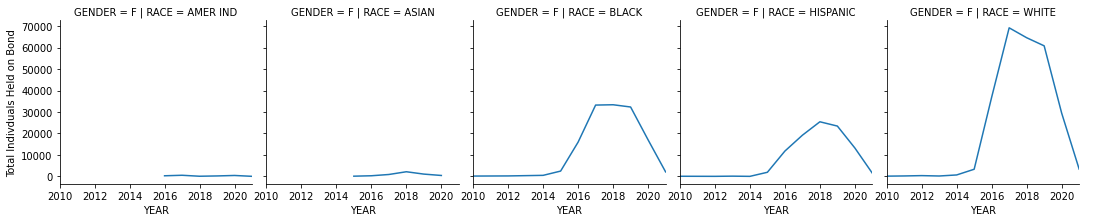

In [ ]:
g = sns.FacetGrid(F_count_frames, col="RACE", row="GENDER")
g.map_dataframe(sns.lineplot, x="Year", y= "Date")
g.set_axis_labels("YEAR", "Total Indivduals Held on Bond")
plt.xlim(2010,2021)
g.add_legend()

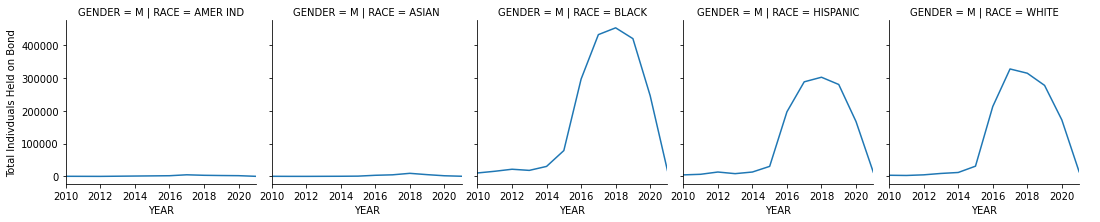

In [ ]:
g = sns.FacetGrid(M_count_frames, col="RACE", row="GENDER")
g.map_dataframe(sns.lineplot, x="Year", y="Date")
g.set_axis_labels("YEAR", "Total Indivduals Held on Bond")
plt.xlim(2010,2021)
g.add_legend()

In [ ]:
# Group by race & gender & bail amounts 
df_race_gender_average= df.groupby(['GENDER', 'RACE'])['Bond'].mean()
df_race_gender_average

GENDER  RACE    
F       AMER IND    106903.954802
        ASIAN        92171.212535
        BLACK       168174.505839
        HISPANIC    190300.492827
        WHITE        98719.901143
M       AMER IND    155987.355753
        ASIAN       232698.213503
        BLACK       315178.679255
        HISPANIC    260947.448860
        WHITE       177646.664999
Name: Bond, dtype: float64

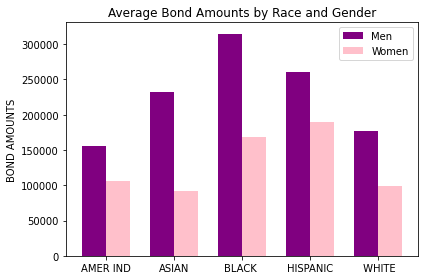

In [ ]:
#PLOT 1 Average Bond Amount between race & gender

labels = ['AMER IND', 'ASIAN', 'BLACK ', 'HISPANIC', ' WHITE']
men_means = [155748.532128, 232742.599207 , 315105.028987, 260895.535516, 177618.248335]
women_means = [106661.219359, 92160.597951, 168158.587609, 190246.443777, 98698.096450]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 =ax.bar(x - width/2, men_means, width, label='Men',color='purple' )
rects2= ax.bar(x + width/2, women_means, width, label='Women', color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('BOND AMOUNTS')
ax.set_title('Average Bond Amounts by Race and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
# Group by Gender and Year
df_gender_year = df.groupby(['Year', 'GENDER']).sum()
df_gender_year

,,AGE,Bond
Year,GENDER,,
1980,M,3721,2135000
1988,M,884,170000
1993,M,1484,140000
1994,M,456,8000
1996,M,27491,114419050
1998,M,68,180000
1999,M,27191,14992500
2000,M,101180,341716800
2001,M,103429,187671450


In [ ]:
# Group by Gender and Year - Count
df_gender_year_count = df.groupby(['Year', 'GENDER']).count()
df_gender_year_count

,,Date,RACE,AGE,Bond,OFFENSE,offense_cat,violence_status
Year,GENDER,,,,,,,
1980,M,61,61,61,61,61,61,61
1988,M,17,17,17,17,17,17,17
1993,M,28,28,28,28,28,28,28
1994,M,8,8,8,8,8,8,8
1996,M,501,501,501,501,501,501,501
1998,M,2,2,2,2,2,2,2
1999,M,575,575,575,575,575,575,575
2000,M,2341,2341,2341,2341,2341,2341,2341
2001,M,2448,2448,2448,2448,2448,2448,2448


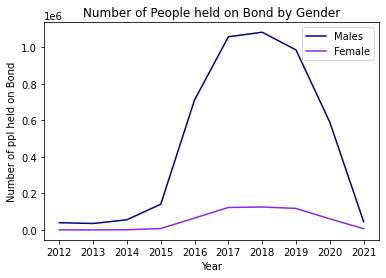

In [ ]:
#PLOT 2 (Created New DataFrame From 2012-2020) # of ppl on bond
year= ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

male=[39679,35444,55795,140871,711068,1056562,1081342,984552,588767,45224]
female = [620,306,1196,7846,65258,123036,125663,117879,60595,6996]
line_chart1 = plt.plot(year, male, color='navy')
line_chart2 = plt.plot(year, female, color='blueviolet')
plt.xlabel('Year',color="black")
plt.ylabel('Number of ppl held on Bond',color="black")
plt.title('Number of People held on Bond by Gender')
plt.legend(['Males', 'Female'], loc=1)
plt.show()

In [ ]:
# Have not yet figured out decade with another variable of race or gender - this gets error
# df_decade_race = df.groupby([(df.Year // 10 * 10), 'Race']).sum()
# df_decade_race.head()

## **EDA and Data Visualization with Matplotlib and Seaborn**

In [ ]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

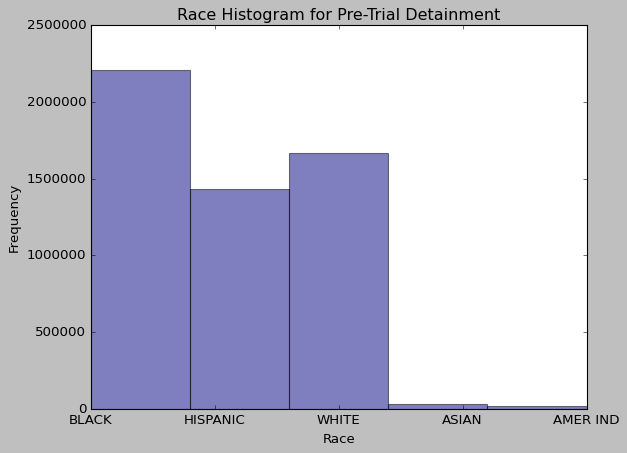

In [ ]:
# Race Histogram
plt.hist(df.RACE, bins=5, facecolor='navy', alpha=0.5)
plt.title('Race Histogram for Pre-Trial Detainment')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

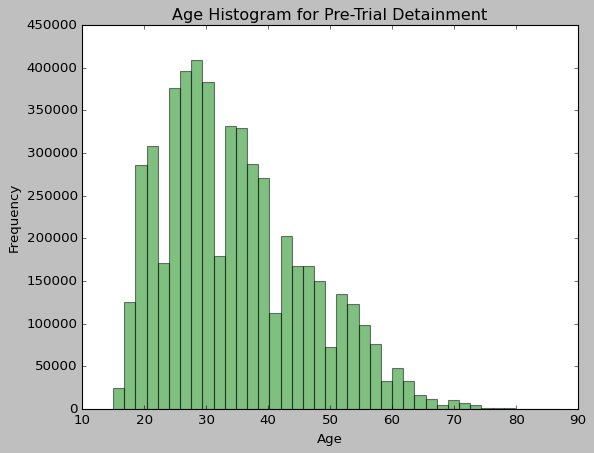

In [ ]:
# Age Histogram
plt.hist(df.AGE, bins=40, facecolor='green', alpha=0.5)
plt.title('Age Histogram for Pre-Trial Detainment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

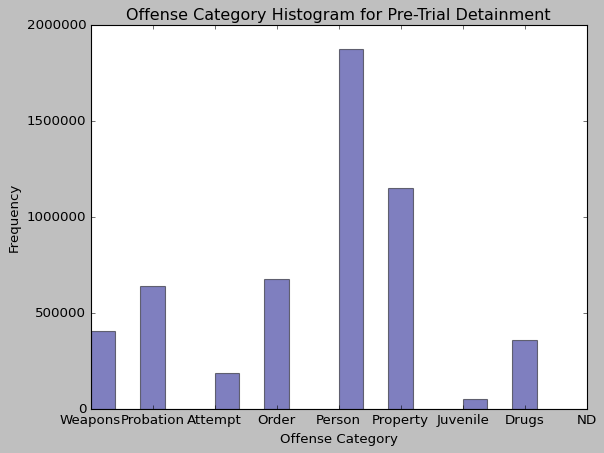

In [ ]:
# Offense Category Histogram
plt.hist(df.offense_cat, bins=20, facecolor='navy', alpha=0.5)
plt.title('Offense Category Histogram for Pre-Trial Detainment')
plt.xlabel('Offense Category')
plt.ylabel('Frequency')
plt.show()

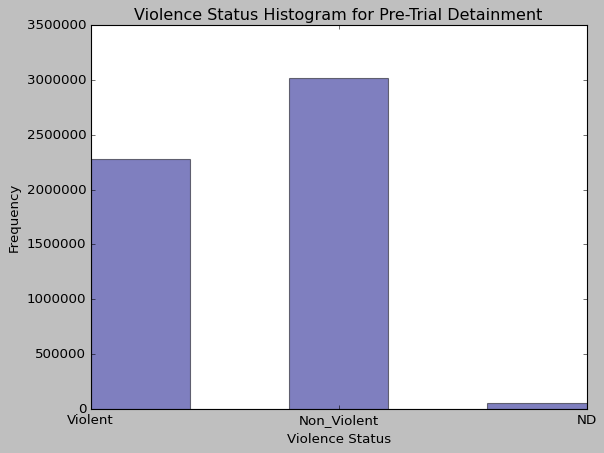

In [ ]:
# Violence Status  Histogram
plt.hist(df.violence_status, bins=5, facecolor='navy', alpha=0.5)
plt.title('Violence Status Histogram for Pre-Trial Detainment')
plt.xlabel('Violence Status')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


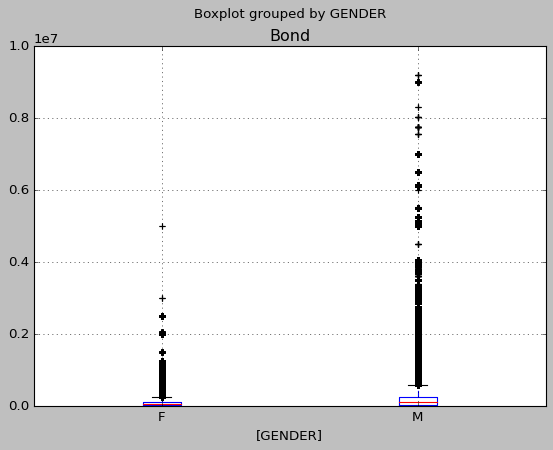

In [ ]:
# Boxplot
boxplot = df.boxplot(column=['Bond' ], by = ['GENDER'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


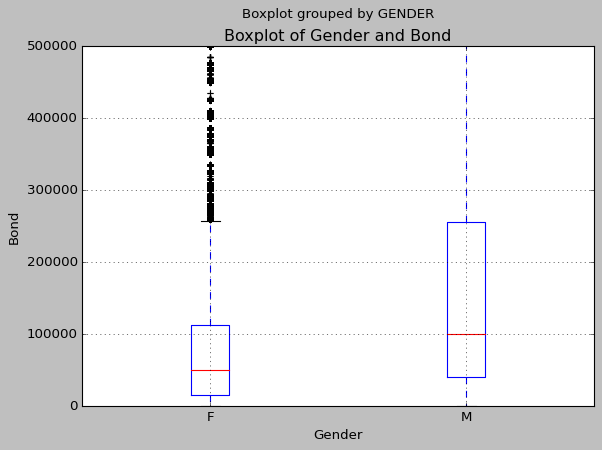

In [ ]:
import seaborn as sns
boxplot = df.boxplot(column=['Bond' ], by = ['GENDER'])
plt.ylim(0, 500000)
plt.xlabel("Gender")
plt.ylabel("Bond")
plt.title("Boxplot of Gender and Bond")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Boxplot of Race and Bond')

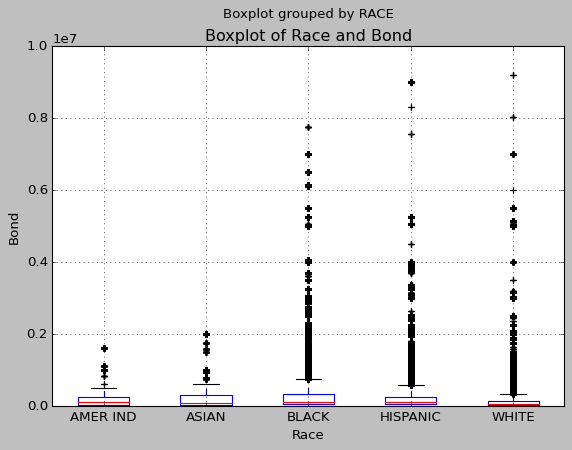

In [ ]:
# Boxplot
boxplot = df.boxplot(column=['Bond' ], by = ['RACE'])
plt.xlabel("Race")
plt.ylabel("Bond")
plt.title("Boxplot of Race and Bond")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


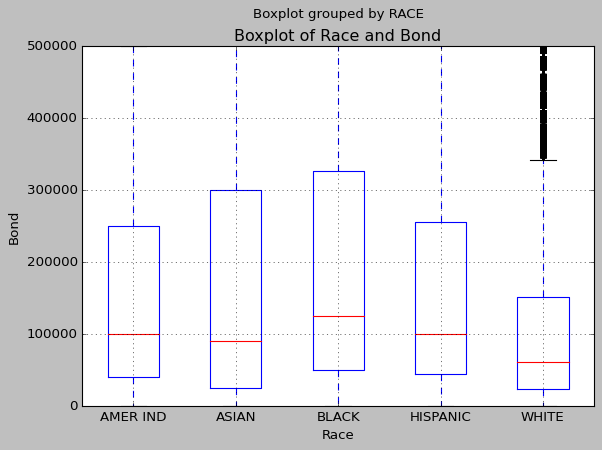

In [ ]:
import seaborn as sns
boxplot = df.boxplot(column=['Bond' ], by = ['RACE'])
plt.ylim(0, 500000)
plt.xlabel("Race")
plt.ylabel("Bond")
plt.title("Boxplot of Race and Bond")
plt.show()

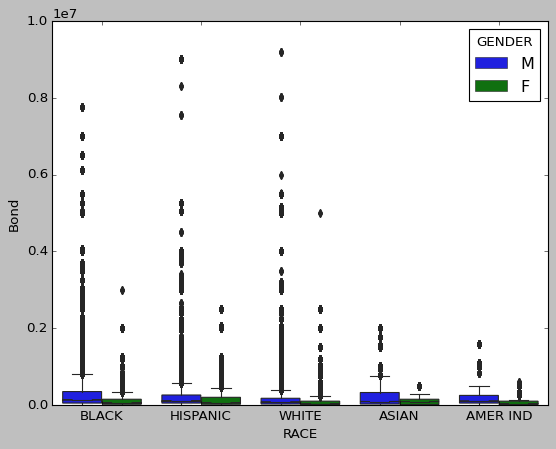

In [ ]:
#Importing required modules
import seaborn as sns
import pandas as ppd
 
 
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'GENDER' , notch = True )

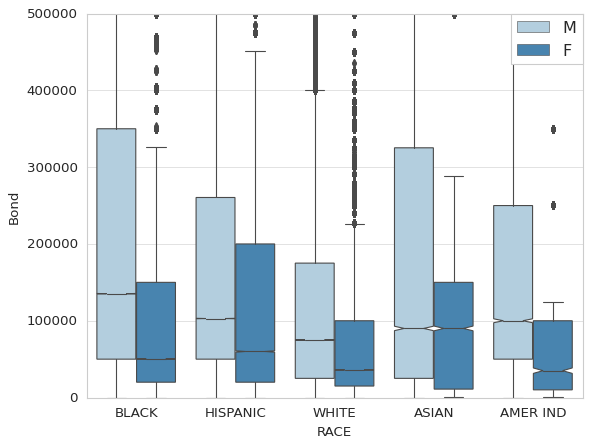

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'GENDER', notch = True, palette="Blues")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)
plt.ylim(0, 500000)
plt.show()

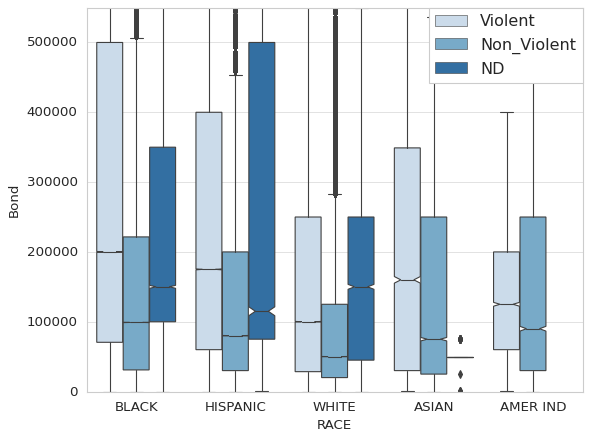

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'violence_status', notch = True, palette="Blues")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)
plt.ylim(0, 550000)
plt.show()

## **Simulated Nonparametric Inference of the Median, Mean and CI for Quantitative Variable - Bond Amount**

In [ ]:
# Multiple functions
# grouped['C'].agg([np.sum, np.mean, np.std])

In [ ]:
#df.groupby('A').aggregate('C').mean()

In [ ]:
#df.groupby('A').C.mean()

In [ ]:
# Median Bootstrapping - Sample 100
bootstrap = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.median() for i in range (1000)]})

In [ ]:
bootstrap.head()

,df
0,75000.0
1,100000.0
2,100550.0
3,100150.0
4,78800.0


In [ ]:
bootstrap.median()

df    100000.0
dtype: float64

In [ ]:
df.Bond.median()

100000.0

In [ ]:
# Median Bootstrapping 2 - Sample 1000
bootstrap2 = pd.DataFrame({'df': [df.sample(1000, replace = True).Bond.median() for i in range (1000)]})

In [ ]:
bootstrap2.median()

df    100000.0
dtype: float64

In [ ]:
# Median Bootstrapping 3 - Sample 5000
bootstrap3 = pd.DataFrame({'df': [df.sample(5000, replace = True).Bond.median() for i in range (5000)]})

In [ ]:
bootstrap3.median()

df    100000.0
dtype: float64

In [ ]:
# Median Bootstrapping 3 - Sample 10%: 535184.9
bootstrap_10pct = pd.DataFrame({'df': [df.sample(535184, replace = True).Bond.median() for i in range (5000)]})

In [ ]:
bootstrap_10pct.median()

df    100000.0
dtype: float64

In [ ]:
# Dataset Mean
df.Bond.mean()

247738.79685189176

In [ ]:
# Mean Bootstrapping - Sample 100
bootstrap4 = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.mean() for i in range (5000)]})
bootstrap4.mean()

df    247327.332778
dtype: float64

In [ ]:
# Mean Bootstrapping 2 - Sample 1000
bootstrap5 = pd.DataFrame({'df': [df.sample(1000, replace = True).Bond.mean() for i in range (5000)]})
bootstrap5.mean()

df    247916.684863
dtype: float64

In [ ]:
# Mean Bootstrapping 3 - Sample 5000
bootstrap6 = pd.DataFrame({'df': [df.sample(5000, replace = True).Bond.mean() for i in range (5000)]})
bootstrap6.mean()

df    247686.566277
dtype: float64

##**Confidence Intervals**

In [ ]:
# 95% Confidence Interval - Median Bootstrapping - 100 Samples
conf_int1 = np.percentile(bootstrap, [2.5, 97.5]) # The middle 95% interval
conf_int1



array([ 74968.75, 150000.  ])

In [ ]:
# 95% Confidence Interval - Median Bootstrapping - 1000 Samples
conf_int2 = np.percentile(bootstrap2, [2.5, 97.5]) # The middle 95% interval
conf_int2


array([ 95000., 100025.])

In [ ]:
# 95% Confidence Interval - Median Bootstrapping - 5000 Samples
conf_int3 = np.percentile(bootstrap3, [2.5, 97.5]) # The middle 95% interval
conf_int3


array([100000., 100000.])

In [ ]:
# 95% Confidence Interval - Median Original Dataset
conf_int_df = np.percentile(df.Bond.median(), [2.5, 97.5]) # The middle 95% interval
conf_int_df


array([100000., 100000.])

In [ ]:
# 95% Confidence Interval - Mean Bootstrapping - 100 Samples
conf_int4 = np.percentile(bootstrap4, [2.5, 97.5]) # The middle 95% interval
conf_int4


array([169982.67225, 344165.05   ])

In [ ]:
# 95% Confidence Interval - Mean Bootstrapping - 1000 Samples
conf_int5 = np.percentile(bootstrap5, [2.5, 97.5]) # The middle 95% interval
conf_int5

array([220882.0368  , 277298.565075])

In [ ]:
# 95% Confidence Interval - Mean Bootstrapping - 5000 Samples
conf_int6 = np.percentile(bootstrap6, [2.5, 97.5]) # The middle 95% interval
conf_int6

array([235557.353655, 260180.47478 ])

In [ ]:
# 95% Confidence Interval - Mean Bootstrapping - Original Dataset
conf_int_dfmean = np.percentile(df.Bond.mean(), [2.5, 97.5]) # The middle 95% interval
conf_int_dfmean


array([247738.79685189, 247738.79685189])

In [ ]:
df_bootstrap = pd.DataFrame(bootstrap, index=[0])
print(df_bootstrap)

        df
0  75000.0


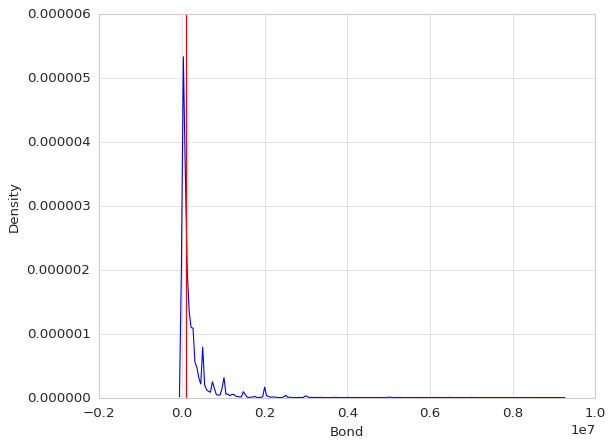

In [ ]:
# Confidence Interval Graph for Dataset - Median
import seaborn as sns
sns.kdeplot(df.Bond)
for endpoint in conf_int_df:
    plt.axvline(endpoint, color='red')

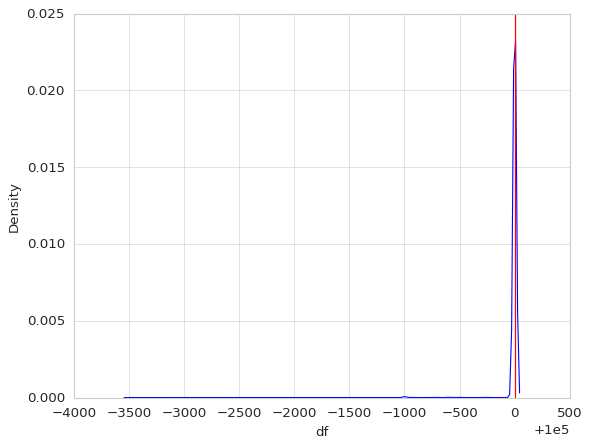

In [ ]:
# Confidence Interval Graph for Bootstrap Sample - Median
import seaborn as sns
sns.kdeplot(bootstrap3.df)
for endpoint in conf_int3:
    plt.axvline(endpoint, color='red')

In [ ]:
#Bootstrapping from all entries in dataset
median_boot_samples = []
for i in range(1000):
                df.Bond = np.random.choice(df.Bond, 5351849)
                median_boot_samples.append(df.Bond.median())
        
np.median(median_boot_samples)

100000.0

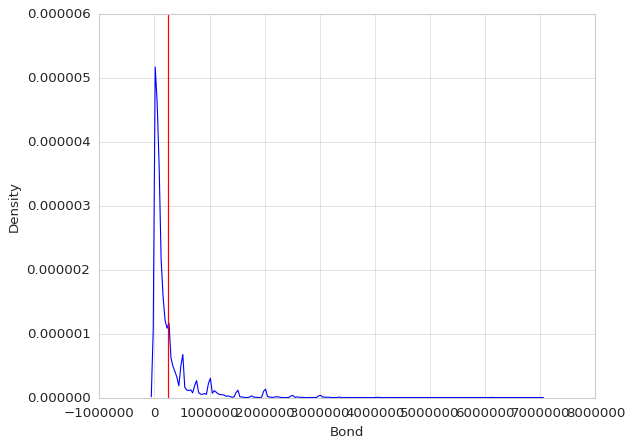

In [ ]:
# Confidence Interval Graph for Dataset Mean
import seaborn as sns
sns.kdeplot(df.Bond)
for endpoint in conf_int_dfmean:
    plt.axvline(endpoint, color='red')

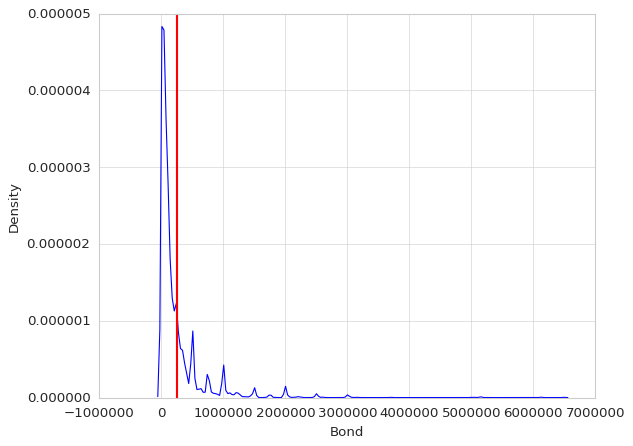

In [ ]:
# Confidence Interval Graph for Bootstrap Mean - Sample 5000
import seaborn as sns
sns.kdeplot(df.Bond)
for endpoint in conf_int6:
    plt.axvline(endpoint, color='red')
    

5351849


In [ ]:
median_boot_samples = []
for i in range(1000):
                df.Bond = np.random.choice(df.Bond, 5351849)
                median_boot_samples.append(df.Bond.median())
        
np.median(median_boot_samples)

100000.0